In [89]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
from sklearn import preprocessing

In [90]:
data = np.loadtxt("Combined-Cycle-Power-Plant-Training-Data.csv",delimiter=",")

In [91]:
X = data[:,0:4]
Y = data[:,4]

In [92]:
scaler = preprocessing.StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [93]:
X_scaled = scaler.transform(X)

In [94]:
X_scaled.shape,Y.shape

((7176, 4), (7176,))

In [95]:
df = pd.DataFrame(X_scaled)
df.describe()

,0,1,2,3
count,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03
mean,-1.942302e-15,-2.070379e-14,-1.895690e-13,-1.273294e-14
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-2.383992e+00,-2.268772e+00,-3.415745e+00,-3.262827e+00
25%,-8.240709e-01,-9.841242e-01,-7.130639e-01,-6.888175e-01
50%,9.168063e-02,-1.755335e-01,-5.918944e-02,1.107203e-01
75%,8.147832e-01,9.608855e-01,6.772576e-01,7.965757e-01
max,2.159312e+00,2.138871e+00,3.359400e+00,1.838351e+00


In [96]:
features = df.columns

for feature in features:
    comp_feature = str(feature) + "_" + str(feature)
    comp_feature_1 = str(feature) + "_" + str(feature) + "_" + str(feature)
    df[comp_feature] = df[feature]*df[feature]
    df[comp_feature_1] = df[feature]*df[feature]*df[feature]
df.describe()

,0,1,2,3,0_0,0_0_0,1_1,1_1_1,2_2,2_2_2,3_3,3_3_3
count,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7.176000e+03,7176.000000,7.176000e+03,7176.000000,7.176000e+03,7176.000000,7.176000e+03,7176.000000
mean,-1.942302e-15,-2.070379e-14,-1.895690e-13,-1.273294e-14,1.000000e+00,-0.127440,1.000000e+00,0.203236,1.000000e+00,0.282518,1.000000e+00,-0.416106
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,9.735049e-01,2.216855,7.471808e-01,1.755241,1.431425e+00,3.957577,1.231853e+00,3.105197
min,-2.383992e+00,-2.268772e+00,-3.415745e+00,-3.262827e+00,1.489307e-09,-13.549229,8.632078e-07,-11.678106,2.584714e-07,-39.852566,1.582746e-07,-34.736176
25%,-8.240709e-01,-9.841242e-01,-7.130639e-01,-6.888175e-01,2.142339e-01,-0.559621,4.358869e-01,-0.953125,1.072206e-01,-0.362565,1.325467e-01,-0.326825
50%,9.168063e-02,-1.755335e-01,-5.918944e-02,1.107203e-01,6.726207e-01,0.000771,9.607976e-01,-0.005409,4.824987e-01,-0.000207,5.668106e-01,0.001357
75%,8.147832e-01,9.608855e-01,6.772576e-01,7.965757e-01,1.564605e+00,0.540911,1.373247e+00,0.887186,1.297140e+00,0.310644,1.401805e+00,0.505454
max,2.159312e+00,2.138871e+00,3.359400e+00,1.838351e+00,5.683420e+00,10.068075,5.147325e+00,9.784844,1.166731e+01,37.912747,1.064604e+01,6.212771


In [97]:
X_scaled = df.values

In [98]:
X_ = np.append(X_scaled,np.ones(X_scaled.shape[0]).reshape(-1,1),axis=1)

In [99]:
def cost(X_train,m,Y_train,lam):
    cost_ = 0
    N = X_train.shape[0]
    for i in range(N):
        cost_ += (1/N)*(((Y_train[i]-((X_train[i]*m).sum()))**2) + lam * ((m**2).sum()))
    return cost_

In [100]:
def step_gradient(X_train,Y_train,m,lr,lam):
    
    slope_m = np.zeros(X_train.shape[1])
    N = X_train.shape[0]
    
    for i in range(N):
        slope_m += ((2/N)*((Y_train[i]-(m*X_train[i]).sum())*(-X_train[i]) + 2*lam*m))
        
    m = m - (lr * slope_m)
    
    return m

In [101]:
def fit(X_train,Y_train,lr=0.001,lam=0.2,epochs=100,verbose=False):
    m = np.zeros(X_train.shape[1])
    last_m = m
    cost_array = []
    unit = epochs//100
    for i in range(epochs+1):
        last_m = m
        m = step_gradient(X_train,Y_train,m,lr,lam)
        cost_ = cost(X_train,m,Y_train,lam)
        #verbose is used to only show the learning process if required, else it is False by default
        if verbose and i%unit==0:
            print("epoch:",i,"cost:",cost_)
            cost_array.append(cost_)
    
    #To continue the learning loop incase the current epoch and learning parameters doesn't lead to saturation
    cont = input("Do you want to continue?:")
        
    while cont=="y":
        
        clear_output(wait=True)
        epochs = int(input("Please enter the number of epochs to continue for:"))
        unit = int(input("Please enter the unit point for epochs:"))
        lr_factor = float(input("Please enter the decay factor for the learning rate:"))
        lr*=lr_factor
        print("Learning rate:",lr)
        for i in range(epochs+1):
            last_m = m
            m = step_gradient(X_train,Y_train,m,lr,lam)
            cost_ = cost(X_train,m,Y_train,lam)
            if verbose and i%unit==0:
                print("epoch:",i,"cost:",cost_)
                cost_array.append(cost_)
        cont = input("Do you want to continue?:")
        
    return m,cost_array

In [102]:
def predict(X_test,m):
    y_pred = []
    for i in range(X_test.shape[0]):
        y_pred.append((X_test[i]*m).sum())
    return np.array(y_pred)

In [103]:
def score(Y_true,Y_pred):
    u = ((Y_true-Y_pred)**2).sum()
    v = ((Y_true-(Y_true.mean()))**2).sum()
    return 1-(u/v)

In [133]:
m, cost_array = fit(X_,Y,epochs=1000,lr=0.01,lam=0,verbose=True)
print(m)

Please enter the number of epochs to continue for:100
Please enter the unit point for epochs:10
Please enter the decay factor for the learning rate:2
Learning rate: 0.03366330000000001
epoch: 0 cost: 18.1106501913135
epoch: 10 cost: 18.11064988624982
epoch: 20 cost: 18.110649599096615
epoch: 30 cost: 18.110649328802552
epoch: 40 cost: 18.110649074377328
epoch: 50 cost: 18.11064883488977
epoch: 60 cost: 18.110648609462626
epoch: 70 cost: 18.110648397270445
epoch: 80 cost: 18.110648197536307
epoch: 90 cost: 18.110648009528642
epoch: 100 cost: 18.110647832559096
Do you want to continue?:n
[-1.45635943e+01 -4.23142450e+00  9.36176561e-01 -1.78528285e+00
  1.81546096e+00  4.14786921e-01 -1.79443776e-01  5.10755411e-01
 -3.62334380e-01 -1.04358326e-01 -1.69943735e-01  1.61089522e-02
  4.53312746e+02]


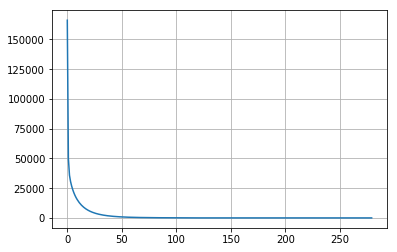

In [134]:
plt.plot(cost_array)
plt.grid()
plt.show()

In [135]:
y_pred = predict(X_,m)
y_pred.shape

(7176,)

In [136]:
score(Y,y_pred)

0.9383052753111001

In [137]:
X_test = np.loadtxt("Combined-Cycle-Power-Plant-Testing-Data.csv",delimiter=",")

In [138]:
X_test_scaled = scaler.transform(X_test)

In [139]:
df_test = pd.DataFrame(X_test_scaled)

In [140]:
features = df_test.columns

for feature in features:
    comp_feature = str(feature) + "_" + str(feature)
    comp_feature_1 = str(feature) + "_" + str(feature) + "_" + str(feature)
    df_test[comp_feature] = df_test[feature]*df_test[feature]
    df_test[comp_feature_1] = df_test[feature]*df_test[feature]*df_test[feature]
df_test.describe()

,0,1,2,3,0_0,0_0_0,1_1,1_1_1,2_2,2_2_2,3_3,3_3_3
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2.392000e+03,2392.000000,2.392000e+03,2392.000000,2.392000e+03,2392.000000
mean,0.011516,0.005537,-0.002652,0.009070,0.975827,-0.123884,9.728550e-01,0.192680,9.652385e-01,0.192362,9.865921e-01,-0.442958
std,0.987979,0.986525,0.982667,0.993440,0.976802,2.210423,7.228607e-01,1.674112,1.442370e+00,4.031154,1.269609e+00,3.213951
min,-2.173951,-2.268772,-3.273234,-3.186924,0.000002,-10.274236,8.632078e-07,-11.678106,2.584714e-07,-35.069622,8.177685e-08,-32.367957
25%,-0.798652,-0.984908,-0.664442,-0.660611,0.196950,-0.509416,4.031565e-01,-0.955411,9.693223e-02,-0.293341,1.179707e-01,-0.288295
50%,0.109741,-0.120634,-0.039909,0.124054,0.646421,0.001322,9.552234e-01,-0.001756,4.341551e-01,-0.000064,5.224931e-01,0.001909
75%,0.808428,0.956964,0.655462,0.767343,1.478985,0.528355,1.354927e+00,0.876369,1.237688e+00,0.281607,1.368008e+00,0.451825
max,2.338583,2.036131,3.357724,1.836300,5.468970,12.789641,5.147325e+00,8.441449,1.127431e+01,37.856011,1.015649e+01,6.191996


In [141]:
X_test = df_test.values

In [142]:
X_test_ = np.append(X_test,np.ones(X_test.shape[0]).reshape(-1,1),axis=1)

In [143]:
X_test_.shape

(2392, 13)

In [144]:
y_pred_test = predict(X_test_,m)

In [145]:
np.savetxt('pred_homogeneous_dummy_features_feature_scaling_reg_0.csv',y_pred_test)